# Logistic Regression

In this notebook, I will be using sklearn to implement a logistic regression algorithm on provided datasets. I will be importing the breast cancer imaging dataset from sklearn, using a percentage of the data to train the model and a percentage to test with. I will also be using matplotlib and panda to put it all together.

In [1]:
# Import required packages

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing and creating the dataset

breastCancerData = load_breast_cancer()
data = pd.DataFrame(breastCancerData.data, columns = breastCancerData.feature_names)
data['target'] = pd.Series(breastCancerData.target)
X = data.iloc[:, 1:30].values
Y = data.iloc[:, 30].values
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# Check to see if any of the data is missing or corrupted

data.isnull().sum()
data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [3]:
# Split the data set into training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0, stratify = Y)

# Scale data for use with algorithm

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Logistic Regression implementation

model = LogisticRegression(random_state = 0, solver = 'lbfgs')
model.fit(X_train_scaled, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
# Get the accuracy of the model on the test set

modelScore = model.score(X_test_scaled, Y_test)
print("The accuracy of the trained model on the test set is {:.2f} percent!".format(modelScore*100))

The accuracy of the trained model on the test set is 95.80 percent!


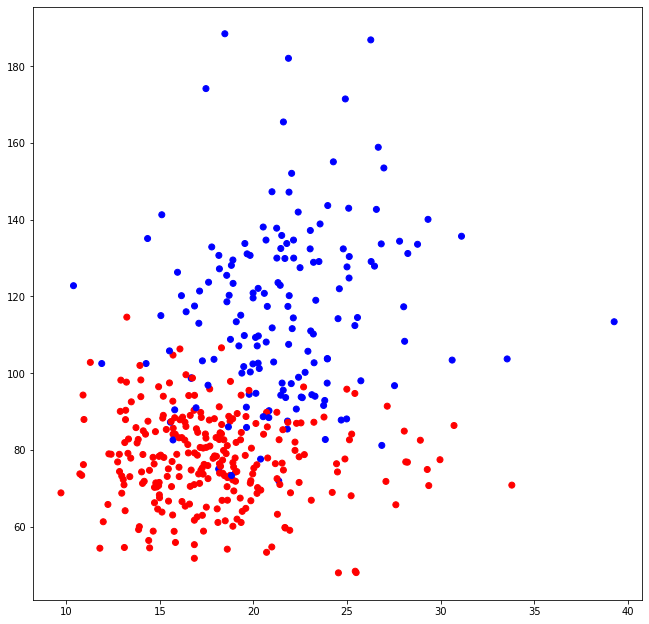

In [5]:
# Plot decision boundary



# Set colors to green and blue

colours = []
for y in Y_train:
    if y == 0:
        colours.append('blue')
    else:
        colours.append('red')

# Plot first subplot
plt.figure(figsize = (24, 24))
plt.subplot(2, 2, 1)
plt.scatter(X_train[0: ,0], X_train[0: ,1], c = colours)